In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
 
train = pd.read_csv(r"C:\Users\HP\Downloads\train_ctrUa4K.csv") 
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
train.shape

(614, 13)

In [3]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [5]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [6]:
train['Gender'].replace(to_replace=['Male','Female'], value=[0,1],inplace=True)

In [7]:
train['Married']= train['Married'].map({'No':0, 'Yes':1})

In [8]:
train['Loan_Status']= train['Loan_Status'].map({'N':0, 'Y':1})

In [9]:
train['Self_Employed']= train['Self_Employed'].map({'No':0, 'Yes':1})

In [10]:
train['Education']= train['Education'].map({'Not Graduate':0, 'Graduate':1})

In [11]:
train['Propert_Area']= train['Property_Area'].map({'Rural':0, 'Urban':1, 'Semiurban':2})

In [12]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Propert_Area          0
dtype: int64

In [13]:
train = train.dropna()
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Propert_Area         0
dtype: int64

Feature: 0, Score: 0.01971
Feature: 1, Score: 0.02604
Feature: 2, Score: 0.02138
Feature: 3, Score: 0.01907
Feature: 4, Score: 0.34594
Feature: 5, Score: 0.32139
Feature: 6, Score: 0.24649


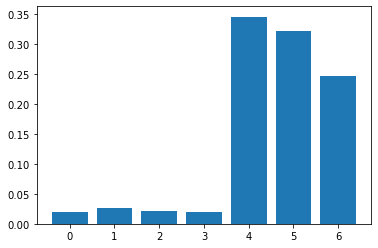

In [14]:
# random forest for feature importance on a classification problem
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
X = train[['Gender', 'Married','Education','Self_Employed', 'ApplicantIncome', 'LoanAmount', 'Credit_History']]
y = train.Loan_Status
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size = 0.2, random_state = 10)
model = RandomForestClassifier(max_depth=4, random_state = 10) 
model.fit(x_train, y_train)
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.8020833333333334

In [16]:
# saving the model 
import pickle 
pickle_out = open("classifier.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()